In [14]:
import pandas as pd
import numpy as np
df = pd.read_csv("innings_deliveries.csv")

In [17]:
print(df.head())

                          team  over        batter    bowler   non_striker  \
0  Royal Challengers Bengaluru     0       V Kohli  I Sharma  F du Plessis   
1  Royal Challengers Bengaluru     0       V Kohli  I Sharma  F du Plessis   
2  Royal Challengers Bengaluru     0  F du Plessis  I Sharma       V Kohli   
3  Royal Challengers Bengaluru     0       V Kohli  I Sharma  F du Plessis   
4  Royal Challengers Bengaluru     0       V Kohli  I Sharma  F du Plessis   

   runs_batter  runs_extras  runs_total player_out wicket_kind fielders  
0            0            0           0        NaN         NaN       []  
1            1            0           1        NaN         NaN       []  
2            1            0           1        NaN         NaN       []  
3            0            0           0        NaN         NaN       []  
4            2            0           2        NaN         NaN       []  


C:\Users\THINKBOOK\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\THINKBOOK\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


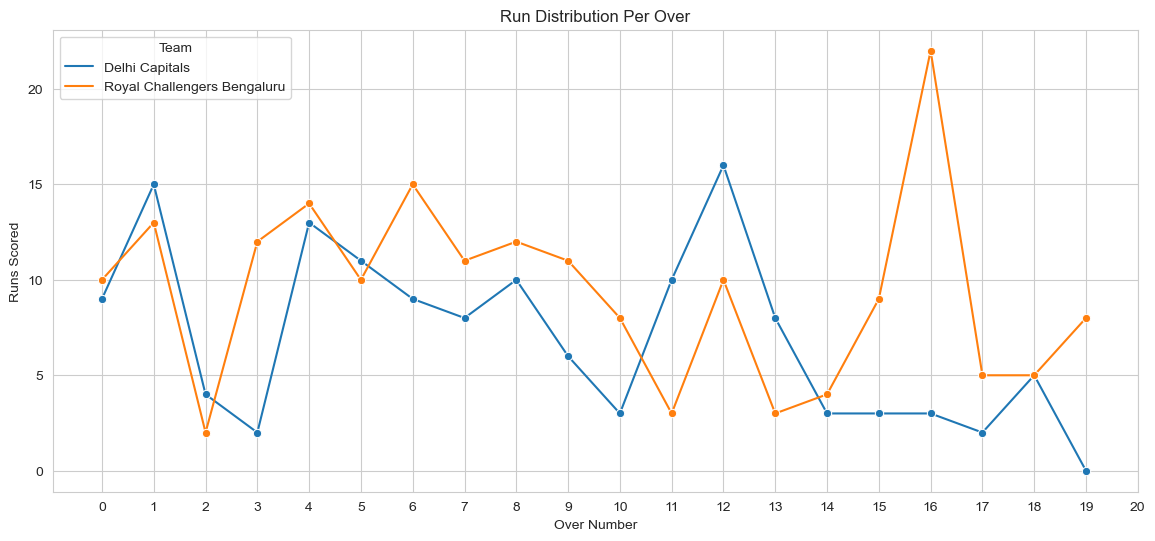

In [18]:
# Visualizing the run distribution per over for both teams to illustrate the scoring trends throughout the innings:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

# data preparation for run distribution per over
run_distribution = df.groupby(['team', 'over']).agg({'runs_total': 'sum'}).reset_index()

# plotting run distribution per over for both teams
plt.figure(figsize=(14, 6))
sns.lineplot(data=run_distribution, x='over', y='runs_total', hue='team', marker='o')
plt.title('Run Distribution Per Over')
plt.xlabel('Over Number')
plt.ylabel('Runs Scored')
plt.xticks(range(0, 21))  # over numbers from 0 to 20
plt.legend(title='Team')
plt.show()

The plot above shows the run distribution per over for both teams. Here are some insights:

### The scoring rate for each team shows fluctuations throughout their innings, with spikes indicating overs with high scoring, likely due to boundaries or big hits.
### Royal Challengers Bangalore (RCB) appears to have a couple of overs with significantly higher runs, suggesting aggressive batting.

# Next, I’ll analyze the top scorers from each team to highlight individual performances. Let’s create a bar chart to visualize the top contributors in terms of runs:

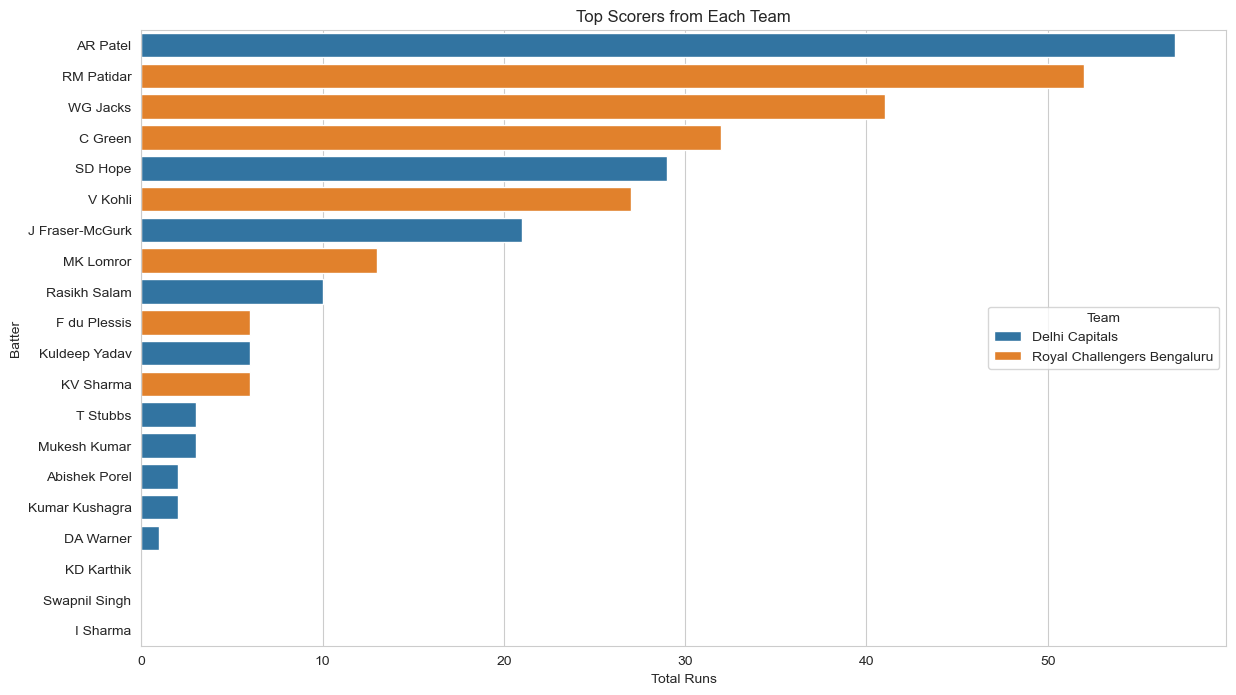

In [20]:
# Calculating top scorers for each team
top_scorers = df.groupby(['team', 'batter']).agg({'runs_batter': 'sum'}).reset_index().sort_values(by='runs_batter', ascending=False)

plt.figure(figsize=(14, 8))
sns.barplot(data=top_scorers, x='runs_batter', y='batter', hue='team', dodge=False)
plt.title('Top Scorers from Each Team')
plt.xlabel('Total Runs')
plt.ylabel('Batter')
plt.legend(title='Team', loc='center right')
plt.show()

Key observations from the graph include:

### AR Patel from Delhi Capitals is the top scorer of the match, significantly outscoring others with a little over 50 runs.
### RM Patidar is the top scorer for Royal Challengers Bangalore, closely approaching 50 runs.
The graph displays a diverse contribution from both teams, with several players from both sides contributing notable scores.

# Now, let’s move on to a bowling analysis. We’ll look at which bowlers took the most wickets and their economy rates.

In [23]:
# Preparing data for bowling analysis
df['wickets_taken'] = deliveries_df['wicket_kind'].notna().astype(int)
bowling_stats = df.groupby(['team', 'bowler']).agg({'runs_total': 'sum', 'wickets_taken': 'sum', 'over': 'nunique'}).reset_index()

# calculating economy rate (total runs conceded / number of overs bowled)
bowling_stats['economy_rate'] = bowling_stats['runs_total'] / bowling_stats['over']

# sorting the data for better visualization
bowling_stats_sorted = bowling_stats.sort_values(by='wickets_taken', ascending=False)

# prepare the DataFrame for plotting
bowling_stats_sorted['wickets_taken'] = df['wicket_kind'].notna().astype(int)
bowling_stats = df.groupby(['team', 'bowler']).agg({'runs_total': 'sum', 'wickets_taken': 'sum', 'over': 'nunique'}).reset_index()
bowling_stats['economy_rate'] = bowling_stats['runs_total'] / bowling_stats['over']
bowling_stats_sorted = bowling_stats.sort_values(by='wickets_taken', ascending=False)


C:\Users\THINKBOOK\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\THINKBOOK\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


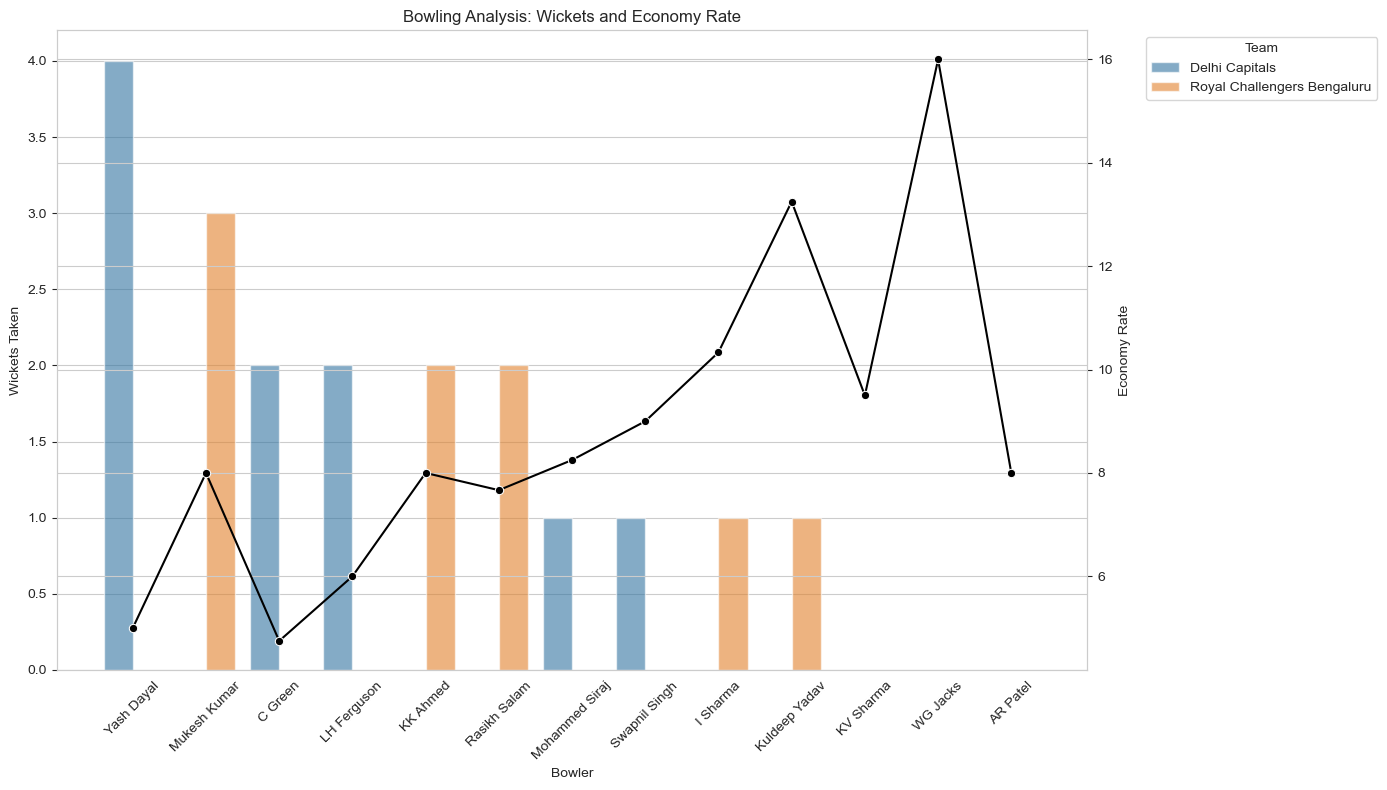

In [24]:
# Creating the plot
fig, ax1 = plt.subplots(figsize=(14, 8))

# Bar plot for wickets
sns.barplot(data=bowling_stats_sorted, x='bowler', y='wickets_taken', hue='team', ax=ax1, alpha=0.6)
ax1.set_ylabel('Wickets Taken')
ax1.set_xlabel('Bowler')
ax1.set_title('Bowling Analysis: Wickets and Economy Rate')
ax1.legend(title='Team', bbox_to_anchor=(1.05, 1), loc='upper left')

for item in ax1.get_xticklabels():
    item.set_rotation(45)

ax2 = ax1.twinx()
sns.lineplot(data=bowling_stats_sorted, x='bowler', y='economy_rate', marker='o', sort=False, ax=ax2, color='black')
ax2.set_ylabel('Economy Rate')

plt.tight_layout()
plt.show()

# Insights
### Wickets Taken: The bars indicate the number of wickets each bowler took during the match. The height of the bars reflects how successful the bowlers were in terms of taking wickets. Bowlers from both teams contributed to taking wickets, with some notable performances that stand out due to higher bars.
### Economy Rate: The line graph overlaid on the bar graph shows the economy rate (number of runs conceded per over) of each bowler. The economy rate is crucial as it indicates how economically a bowler has bowled in terms of runs given away.

# Now, let’s analyze the types of dismissals that occurred during the match to understand how most wickets were taken (e.g., caught, bowled, run out). This can provide insights into the nature of the pitch and the playing conditions. We’ll visualize this using a pie chart:

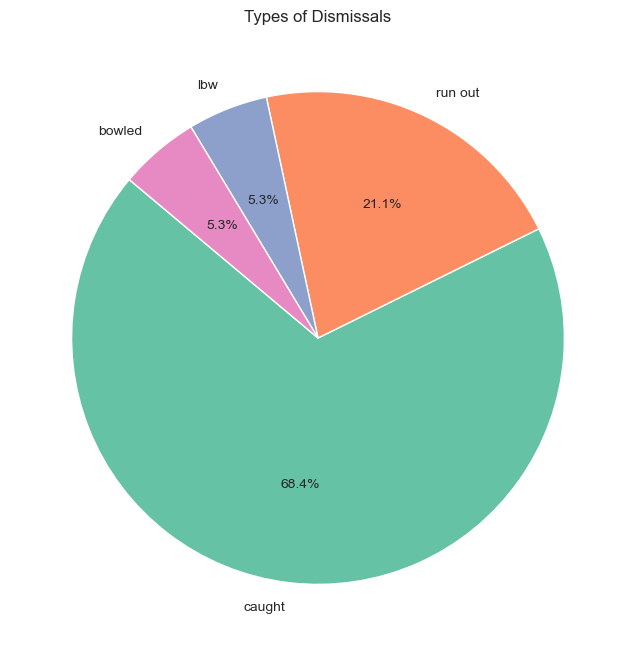

In [25]:
# Counting dismissal types
dismissal_types = df['wicket_kind'].dropna().value_counts()

plt.figure(figsize=(8, 8))
plt.pie(dismissal_types, labels=dismissal_types.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2"))
plt.title('Types of Dismissals')
plt.show()

In [26]:
# Function to classify the phase of the game based on the over number
def classify_phase(over):
    if over < 6:
        return 'Powerplay'
    elif over < 16:
        return 'Middle'
    else:
        return 'Death'


In [27]:
# Adding phase information to the dataframe
df['phase'] = deliveries_df['over'].apply(classify_phase)

# grouping data by phase and team to calculate runs and wickets
phase_analysis =df.groupby(['team', 'phase']).agg({'runs_total': 'sum', 'wickets_taken': 'sum', 'over': 'count'}).rename(columns={'over': 'balls'}).reset_index()

# calculating the run rate
phase_analysis['run_rate'] = (phase_analysis['runs_total'] / phase_analysis['balls']) * 6

C:\Users\THINKBOOK\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\THINKBOOK\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


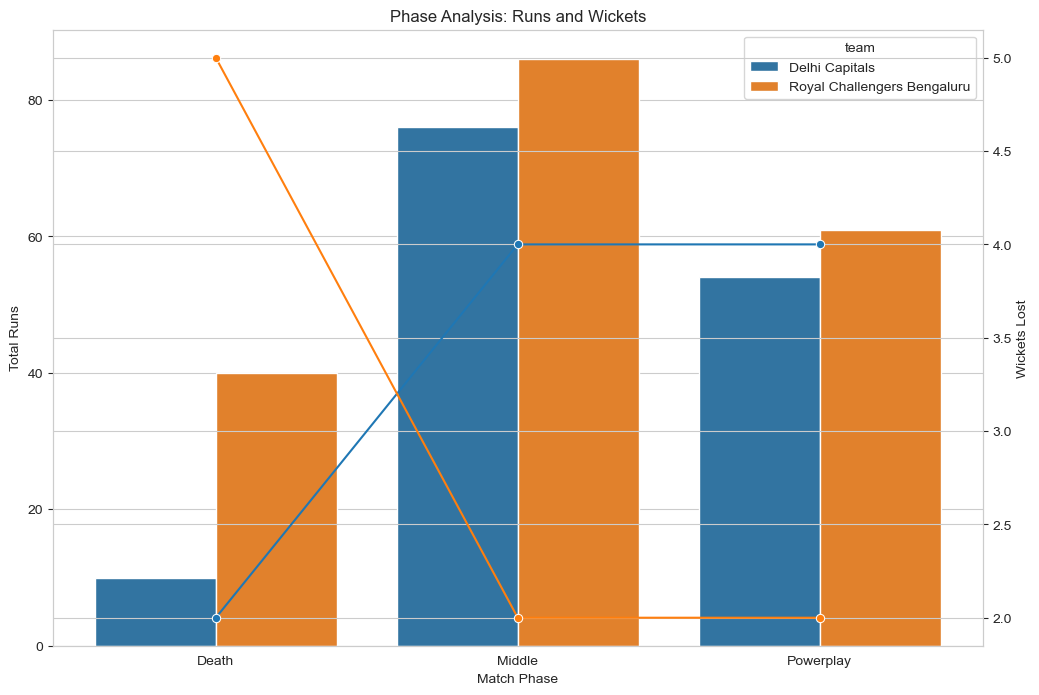

In [28]:
# Plotting the phase analysis
fig, ax1 = plt.subplots(figsize=(12, 8))

# bar plot for runs scored in each phase
sns.barplot(data=phase_analysis, x='phase', y='runs_total', hue='team', ax=ax1)
ax1.set_title('Phase Analysis: Runs and Wickets')
ax1.set_ylabel('Total Runs')
ax1.set_xlabel('Match Phase')

# line plot for wickets lost
ax2 = ax1.twinx()
sns.lineplot(data=phase_analysis, x='phase', y='wickets_taken', hue='team', marker='o', ax=ax2, legend=False)
ax2.set_ylabel('Wickets Lost')

plt.show()

## Insights

### Powerplay: Both teams have a relatively low total of runs, with RCB losing more wickets than DC in this phase, as indicated by the height of the orange line.
### Middle: This phase shows the highest run-scoring for both teams, with DC scoring slightly more than RCB. The wickets lost remain controlled, suggesting stable innings from both teams.
### Death: RCB has a sharp decrease in runs compared to the Middle phase, while DC maintains a high run rate. Wickets lost by RCB increased significantly in this phase, marked by the orange line peaking near 4.5, indicating a possible collapse or aggressive batting that did not pay off.

# Now, let’s calculate the strike rates for all batters in this match and then analyze the data to see which players were the most effective in terms of scoring quickly. 

In [30]:
# Calculate runs and balls faced for each batter
batter_stats = deliveries_df.groupby('batter').agg({'runs_batter': 'sum', 'over': 'count'}).rename(columns={'over': 'balls_faced'}).reset_index()

# Calculate strike rate for each batter (runs per 100 balls)
batter_stats['strike_rate'] = (batter_stats['runs_batter'] / batter_stats['balls_faced']) * 100

# Sorting batters by their strike rate
batter_stats_sorted = batter_stats.sort_values(by='strike_rate', ascending=False)

# Displaying calculated strike rates along with runs scored and balls faced
batter_stats_sorted.head(10)

,batter,runs_batter,balls_faced,strike_rate
6,J Fraser-McGurk,21,8,262.500000
18,V Kohli,27,14,192.857143
13,RM Patidar,52,34,152.941176
8,KV Sharma,6,4,150.000000
0,AR Patel,57,40,142.500000
19,WG Jacks,41,30,136.666667
2,C Green,32,24,133.333333
11,MK Lomror,13,10,130.000000
15,SD Hope,29,24,120.833333
4,F du Plessis,6,7,85.714286


## Here are the top performers in terms of strike rate from the match:
### J Fraser-McGurk had the highest strike rate at 262.50, scoring 21 runs from just 8 balls.
### Virat Kohli also scored efficiently, with a strike rate of 192.86, making 27 runs from 14 balls.
### Rajat Patidar contributed significantly with a strike rate of 152.94, accumulating 52 runs from 34 balls.

# Identifying Turning Points of the Match

## We will analyze the cumulative run rate comparison throughout the innings and look at wicket fall events.

C:\Users\THINKBOOK\AppData\Local\Temp\ipykernel_22768\4264906658.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rcb_deliveries['over_ball'] = rcb_deliveries['over'] + (rcb_deliveries.groupby('over').cumcount() + 1) / 6
C:\Users\THINKBOOK\AppData\Local\Temp\ipykernel_22768\4264906658.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dc_deliveries['over_ball'] = dc_deliveries['over'] + (dc_deliveries.groupby('over').cumcount() + 1) / 6


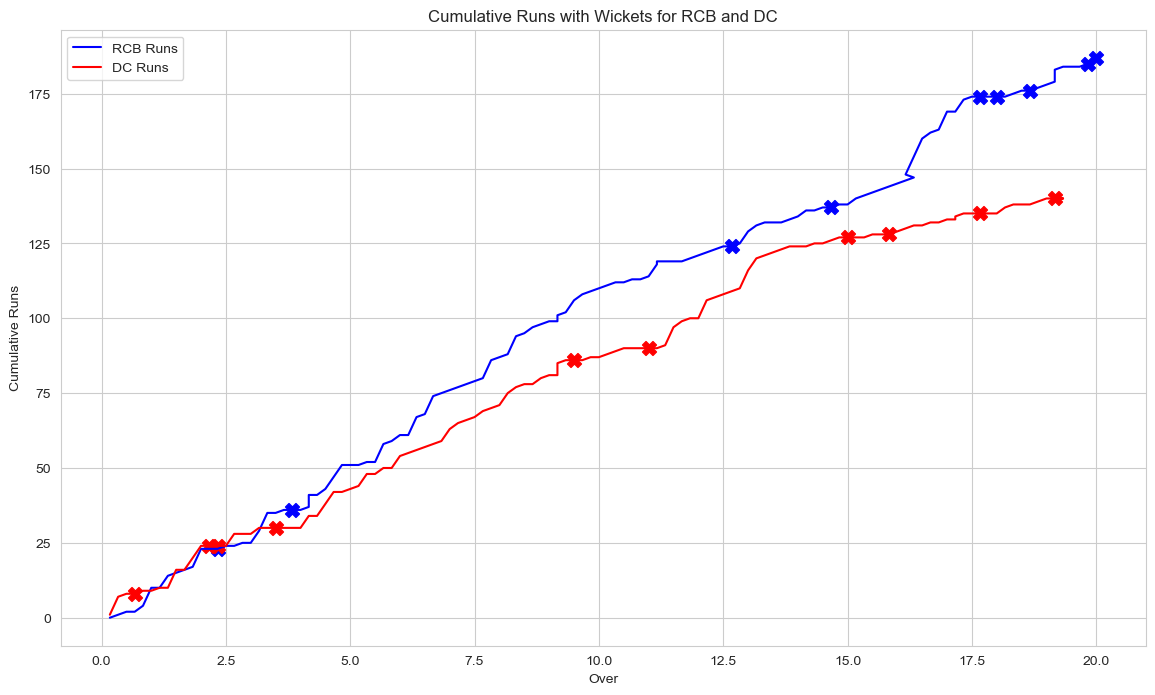

In [36]:
# Calculate cumulative runs and wickets for each ball for both teams
df['cumulative_runs'] = df.groupby('team')['runs_total'].cumsum()
df['cumulative_wickets'] = df.groupby('team')['wickets_taken'].cumsum()

# Separate data for both teams
rcb_deliveries = df[df['team'] == 'Royal Challengers Bengaluru']
dc_deliveries = df[df['team'] == 'Delhi Capitals']

# Calculating overs for cumulative analysis
rcb_deliveries['over_ball'] = rcb_deliveries['over'] + (rcb_deliveries.groupby('over').cumcount() + 1) / 6
dc_deliveries['over_ball'] = dc_deliveries['over'] + (dc_deliveries.groupby('over').cumcount() + 1) / 6

# Plotting cumulative run rates and wickets
fig, ax = plt.subplots(figsize=(14, 8))

# Plot for RCB
ax.plot(rcb_deliveries['over_ball'], rcb_deliveries['cumulative_runs'], color='blue', label='RCB Runs')
ax.scatter(rcb_deliveries[rcb_deliveries['wickets_taken'] == 1]['over_ball'], rcb_deliveries[rcb_deliveries['wickets_taken'] == 1]['cumulative_runs'], color='blue', marker='X', s=100)

# Plot for DC
ax.plot(dc_deliveries['over_ball'], dc_deliveries['cumulative_runs'], color='red', label='DC Runs')
ax.scatter(dc_deliveries[dc_deliveries['wickets_taken'] == 1]['over_ball'], dc_deliveries[dc_deliveries['wickets_taken'] == 1]['cumulative_runs'], color='red', marker='X', s=100)

ax.set_title('Cumulative Runs with Wickets for RCB and DC')
ax.set_xlabel('Over')
ax.set_ylabel('Cumulative Runs')
ax.legend()
plt.show()

## The plot shows the cumulative runs scored by each team throughout their innings, with markers indicating wickets:
### Momentum Shifts: The points where wickets are lost are crucial. Despite wickets, RCB’s run line does not show any drastic downturns, suggesting effective recovery by subsequent batters.
### Performance Analysis: RCB’s ability to keep the run rate up despite losing wickets might indicate deeper batting strength or successful innings pacing strategies. In contrast, DC, while also increasing their score, does so at a less steep rate, possibly indicating fewer big overs.


# Summary

 ## The match between RCB and DC showcased a blend of strategic batting, aggressive bowling, and critical partnerships. RCB’s ability to maintain a higher cumulative run rate and effective wicket-taking in crucial overs contributed significantly to their victory. The phase analysis and player-specific analysis not only highlights the dynamics of T20 cricket but also assists in understanding how momentum shifts and strategic decisions impact the game’s outcome.